<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   400 non-null    int64  
 1   Sales        400 non-null    float64
 2   CompPrice    400 non-null    int64  
 3   Income       400 non-null    int64  
 4   Advertising  400 non-null    int64  
 5   Population   400 non-null    int64  
 6   Price        400 non-null    int64  
 7   ShelveLoc    400 non-null    int32  
 8   Age          400 non-null    int64  
 9   Education    400 non-null    int64  
 10  Urban        400 non-null    int64  
 11  US           400 non-null    int64  
 12  High         400 non-null    int64  
dtypes: float64(1), int32(1), int64(11)
memory usage: 39.1 KB
----------------------------------
----------------------------------
----------------------------------
     Unnamed: 0  CompPrice  Income  Advertising  Population  Price  ShelveLoc  \
0             1  

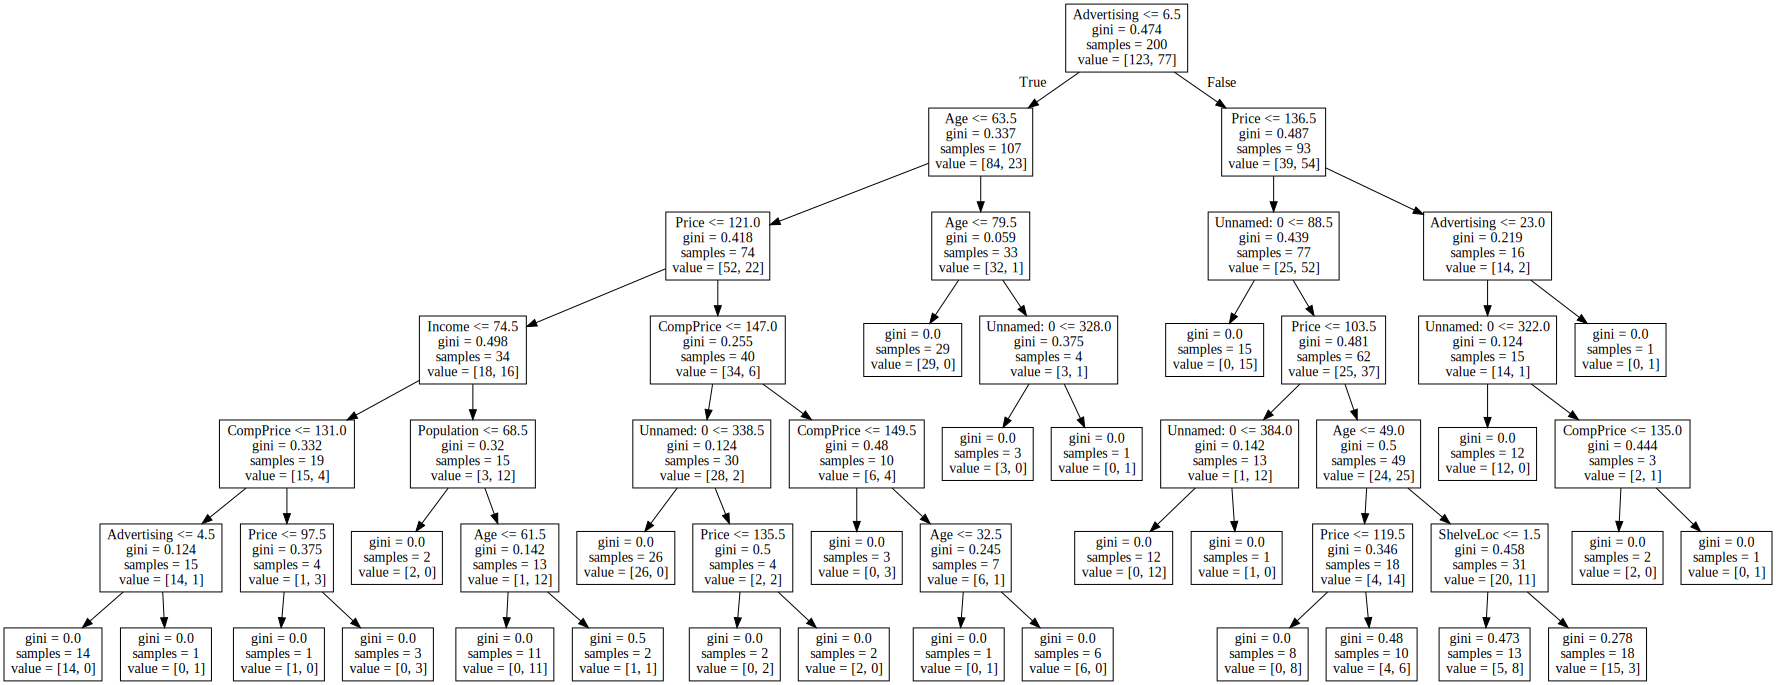

In [3]:
#Mia Baden May 21
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import graphviz
#%matplotlib inline
#--------------------s
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error, accuracy_score

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'


df3 = pd.read_csv('carseats.txt', error_bad_lines = False)#.drop(’Unnamed: 0’, axis=1)
#print(df3)
#if any of the variables are greater then 8 increment
#high variable by 1
#print("this is the high variable")
df3['High'] = df3.Sales.map(lambda x: 1 if x>8 else 0)
#print(df3['High'])
#print("what ShelveLoc sotres")
#isolate with only original values and label them enumerated.
df3.ShelveLoc = pd.factorize(df3.ShelveLoc)[0]
#print(df3.ShelveLoc)
df3.Urban = df3.Urban.map({'No': 0, 'Yes' : 1})
#print(df3.Urban)
df3.US = df3.US.map({'No':0, 'Yes':1})
df3.info()
X = df3.drop(['Sales', 'High'], axis= 1)
print("----------------------------------")
print("----------------------------------")
print("----------------------------------")
print(X)
Y = df3.High
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.5, random_state=3)
#we limit the depth of the tree using max_depth
clf = DecisionTreeClassifier(max_depth=6)
clf.fit(X_train, Y_train)
clf.score(X_train, Y_train)
print(clf)
export_graphviz(clf, out_file="mytree.dot", feature_names=X_train.columns)
with open("mytree.dot") as f:
	dot_graph = f.read()

graphviz.Source(dot_graph)


In [16]:

pred = clf.predict(X_test)
cm = pd.DataFrame(confusion_matrix(Y_test, pred).T, index =['No','Yes'],columns=['No','Yes'])
print(cm)

     No  Yes
No   74   34
Yes  39   53


In [20]:
boston_df = pd.read_csv('Boston.csv')
X = boston_df.drop('medv', axis=1)
Y = boston_df.medv
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.5, random_state = 0)
regr2= DecisionTreeRegressor(max_depth = 2)
regr2.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

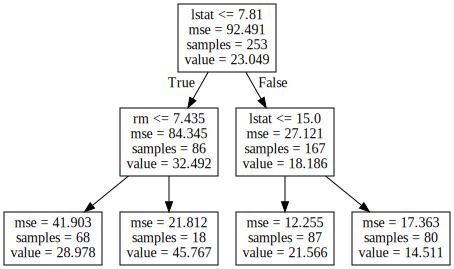

In [21]:
export_graphviz(regr2, out_file="mytree.dot", feature_names=X_train.columns) 
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

28.80154486445795

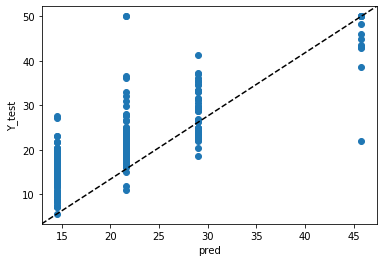

In [30]:
pred = regr2.predict(X_test)
plt.scatter(pred, Y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('Y_test')
mean_squared_error(Y_test, pred)

C:\Users\18mia\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


NameError: name 'y_test' is not defined

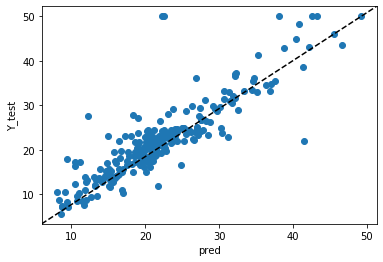

In [40]:
regr1 = RandomForestRegressor(max_features=13, random_state=1)
regr1.fit(X_train, Y_train)
pred = regr1.predict(X_test)
plt.scatter(pred, Y_test)
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes) 
plt.xlabel('pred')
plt.ylabel('Y_test') 
mean_squared_error(y_test, pred)



In [42]:
# Random forests: using 6 features 
regr2 = RandomForestRegressor(max_features=6, random_state=1)
regr2.fit(X_train, Y_train)
pred = regr2.predict(X_test) 
mean_squared_error(Y_test, pred)


C:\Users\18mia\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


17.27308972332016

In [7]:
Importance = pd.DataFrame(s= {regr2.feature_importances_*100}, index=X.columns)
Importance.sort_values( axis=0, ascending=True).plot(kind=’barh’, color=’r’ )
plt.xlabel(’Variable Importance’)
plt.gca().legend_ = None


SyntaxError: invalid character in identifier (<ipython-input-7-16a79748632c>, line 2)